<a href="https://colab.research.google.com/github/suruchi1997/yolov7/blob/main/Copy_of_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#importing libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
     

In [64]:
import matplotlib.pyplot as plt

In [65]:
# model 1 is CNN with multiple dense layers at the end 
def Model1():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
 
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  model.summary()
  return model

# model 2 is CNN model with one dense layer at the end
def Model2():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  model.summary()
  return model

In [66]:
# for visualizing predictions.If color is green then image is classified correctly and if color is red then image is incorrectly classified by  network
from matplotlib import pyplot
def plot_predictions(images, predictions, true_labels):
  LABEL_NAMES=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      LABEL_NAMES[pred_label], 
      LABEL_NAMES[true_labels[i][0]],
      confidence
    ), color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)  


In [72]:
#  display 16 images from test set with their actual and predicted label. Probability of prediction
def Vis_perf1(mod1):
  plot_predictions(
    np.squeeze(x_test[:16]), 
    mod1.predict(x_test[:16]),
    y_test[:16])


# evaluate  train , validation and test accuracy and losses
def Vis_perf2(mod1,history):
  

  print()
  score = mod1.evaluate(x_test, y_test, verbose=0)
  print(["test_loss","test_accuracy"])
  print(mod1.metrics_names)
  print(score)
  print()

  plt.subplot(321)
  plt.title('Losses vs. Epoch')
  plt.plot(history.history['loss'], color='green', label='Train Loss')
  plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
  plt.legend()
  plt.subplot(322)
  plt.title('Accuracies vs. Epoch')
  plt.plot(history.history['sparse_categorical_accuracy'], color='green', label='Train Accuracy')
  plt.plot(history.history['val_sparse_categorical_accuracy'], color='blue', label='Val Accuracy')
  plt.legend()
  plt.show()

In [68]:
# Normalizing the input data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [69]:
# multiplying data by [0.299,0.587,0.114] for grayscale conversion . These are basically weights assigned to Red Green and Blue component.
# Since green is lighter than pure blue and pure red it has highest weightage.
# Suppose a rgb representation of pixel is (x1,y1,z1) than its equivalent grayscale is 0.229*(x1) + 0.587*(x2)+ 0.114*(x3)

x_train=np.expand_dims(np.dot(x_train[...,:3], [0.299, 0.587, 0.114]),-1)
x_test=np.expand_dims(np.dot(x_test[...,:3], [0.299, 0.587, 0.114]),-1)


In [70]:
#Splitting the train datat into train and validation set. 
s = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


# Gray Scale images and model with mutiple dense layers


In [71]:
# Using model 1 with grayscale images
mod1=Model1()
mod1.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)
# To preprocess images data gen is used 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#  training the mod1
batch_size=128

history=mod1.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_valid, y_valid)
)






Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_27 (Bat  (None, 32, 32, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

<ipython-input-71-6f255568ff5c>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=mod1.fit_generator(


326/326 [==============================] - 18s 45ms/step - loss: 1.5724 - sparse_categorical_accuracy: 0.4371 - val_loss: 8.2380 - val_sparse_categorical_accuracy: 0.1016
Epoch 2/10
326/326 [==============================] - 14s 43ms/step - loss: 1.1634 - sparse_categorical_accuracy: 0.5914 - val_loss: 1.3646 - val_sparse_categorical_accuracy: 0.5582
Epoch 3/10
326/326 [==============================] - 15s 45ms/step - loss: 0.9803 - sparse_categorical_accuracy: 0.6579 - val_loss: 0.9024 - val_sparse_categorical_accuracy: 0.6932
Epoch 4/10
326/326 [==============================] - 15s 45ms/step - loss: 0.8774 - sparse_categorical_accuracy: 0.6972 - val_loss: 0.9229 - val_sparse_categorical_accuracy: 0.6806
Epoch 5/10
326/326 [==============================] - 14s 43ms/step - loss: 0.8099 - sparse_categorical_accuracy: 0.7189 - val_loss: 0.7788 - val_sparse_categorical_accuracy: 0.7336
Epoch 6/10
326/326 [==============================] - 14s 44ms/step - loss: 0.7464 - sparse_categoric

1/1 [==============================] - 0s 101ms/step


<Figure size 400x300 with 0 Axes>

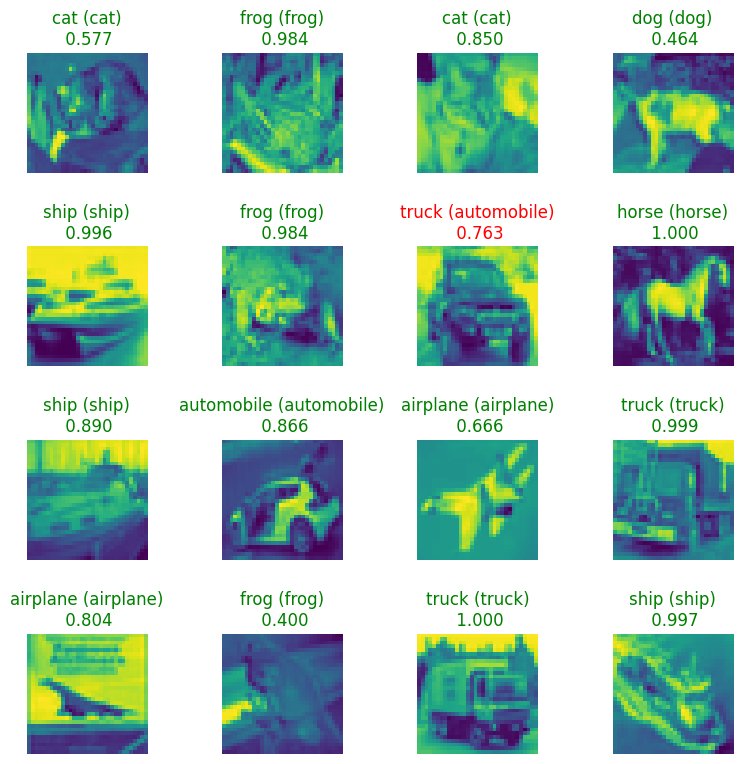

In [73]:
Vis_perf1(mod1)


['test_loss', 'test_accuracy']
['loss', 'sparse_categorical_accuracy']
[0.6794183850288391, 0.7764000296592712]



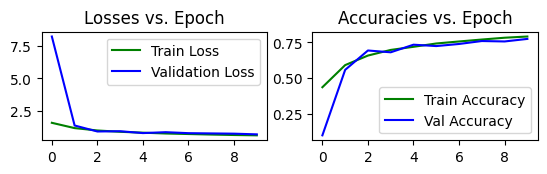

In [74]:
Vis_perf2(mod1,history)

     

#Gray Scale images and model with single dense layers

In [75]:
# Using model 2 with grayscale images
mod1=Model2()
mod1.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)
# To preprocess images data gen is used 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#  training the mod1
batch_size=128

history=mod1.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_valid, y_valid)
)






Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_30 (Bat  (None, 32, 32, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_31 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                     

<ipython-input-75-14bc2b72e771>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=mod1.fit_generator(


326/326 [==============================] - 17s 46ms/step - loss: 1.6567 - sparse_categorical_accuracy: 0.4567 - val_loss: 9.3640 - val_sparse_categorical_accuracy: 0.1362
Epoch 2/10
326/326 [==============================] - 14s 44ms/step - loss: 1.1282 - sparse_categorical_accuracy: 0.6109 - val_loss: 1.3205 - val_sparse_categorical_accuracy: 0.6076
Epoch 3/10
326/326 [==============================] - 14s 42ms/step - loss: 0.9825 - sparse_categorical_accuracy: 0.6605 - val_loss: 0.9704 - val_sparse_categorical_accuracy: 0.6889
Epoch 4/10
326/326 [==============================] - 14s 44ms/step - loss: 0.8917 - sparse_categorical_accuracy: 0.6927 - val_loss: 1.0690 - val_sparse_categorical_accuracy: 0.6679
Epoch 5/10
326/326 [==============================] - 14s 42ms/step - loss: 0.8365 - sparse_categorical_accuracy: 0.7119 - val_loss: 0.8314 - val_sparse_categorical_accuracy: 0.7289
Epoch 6/10
326/326 [==============================] - 14s 43ms/step - loss: 0.7822 - sparse_categoric

1/1 [==============================] - 0s 105ms/step


<Figure size 400x300 with 0 Axes>

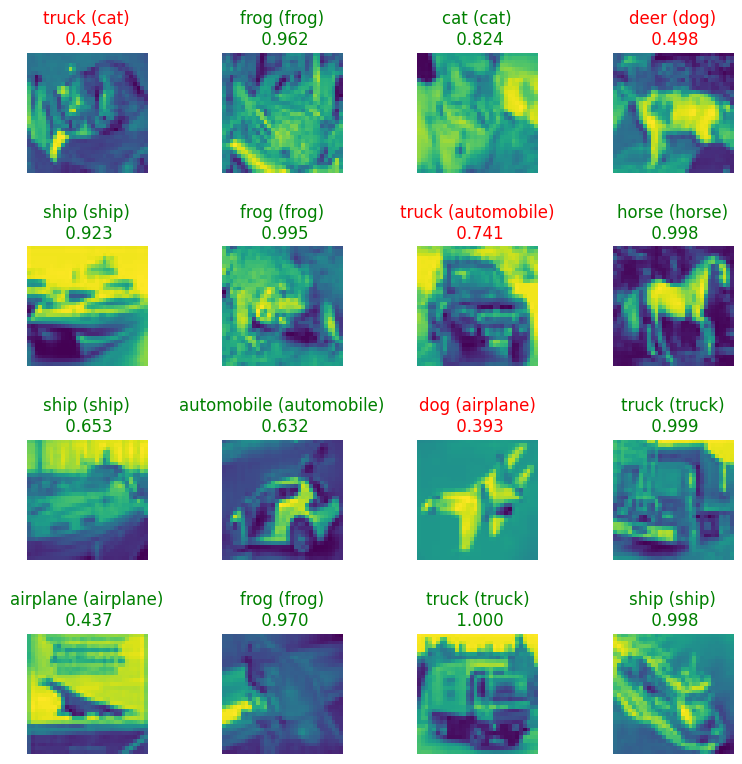

In [76]:
Vis_perf1(mod1)


['test_loss', 'test_accuracy']
['loss', 'sparse_categorical_accuracy']
[0.7865287661552429, 0.7432000041007996]



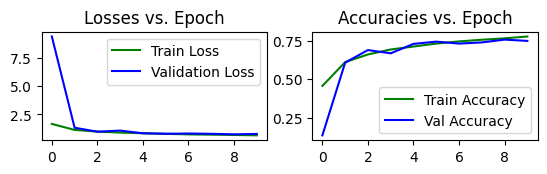

In [77]:
Vis_perf2(mod1,history)

#RGB images with model with multiple dense layers



In [78]:
# loading data  
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [79]:
# Normalizing images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


In [80]:
# Segregating training and validation set 
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 32, 32, 3) (8334, 32, 32, 3) (10000, 32, 32, 3)


In [81]:
# Using model 1 with colored images
mod1=Model1()
mod1.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)
# To preprocess images data gen is used 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#  training the mod1
batch_size=128

history=mod1.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_valid, y_valid)
)






Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_34 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                     

<ipython-input-81-f015e77c404d>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=mod1.fit_generator(


326/326 [==============================] - 29s 79ms/step - loss: 1.4642 - sparse_categorical_accuracy: 0.4749 - val_loss: 1.6868 - val_sparse_categorical_accuracy: 0.4416
Epoch 2/10
326/326 [==============================] - 25s 76ms/step - loss: 1.0379 - sparse_categorical_accuracy: 0.6295 - val_loss: 0.9724 - val_sparse_categorical_accuracy: 0.6704
Epoch 3/10
326/326 [==============================] - 25s 77ms/step - loss: 0.8685 - sparse_categorical_accuracy: 0.6976 - val_loss: 0.8684 - val_sparse_categorical_accuracy: 0.7052
Epoch 4/10
326/326 [==============================] - 25s 78ms/step - loss: 0.7494 - sparse_categorical_accuracy: 0.7391 - val_loss: 0.8426 - val_sparse_categorical_accuracy: 0.7166
Epoch 5/10
326/326 [==============================] - 25s 78ms/step - loss: 0.6819 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.7292 - val_sparse_categorical_accuracy: 0.7534
Epoch 6/10
326/326 [==============================] - 25s 78ms/step - loss: 0.6238 - sparse_categoric

1/1 [==============================] - 0s 115ms/step


<Figure size 400x300 with 0 Axes>

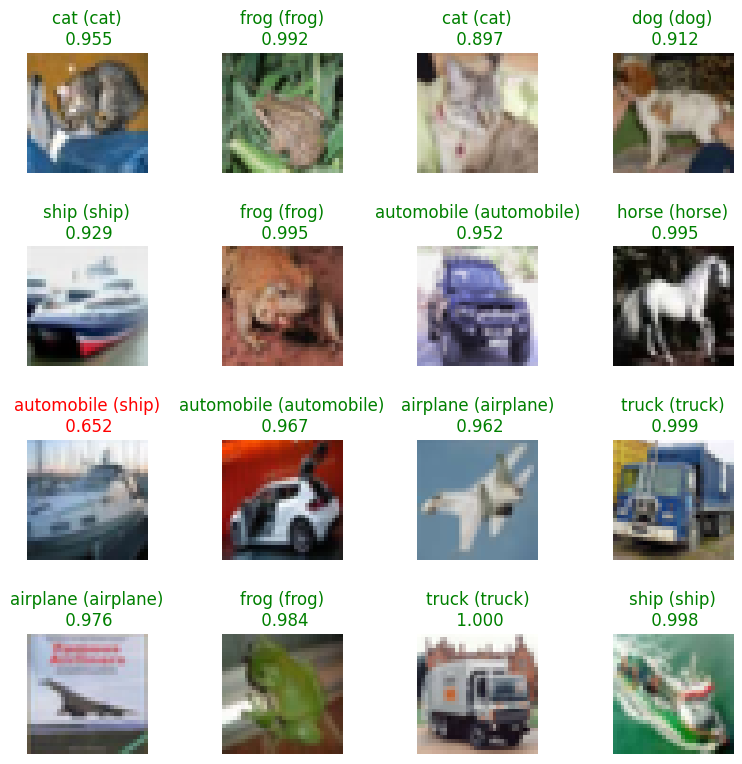

In [82]:
Vis_perf1(mod1)


['test_loss', 'test_accuracy']
['loss', 'sparse_categorical_accuracy']
[0.642134964466095, 0.7929999828338623]



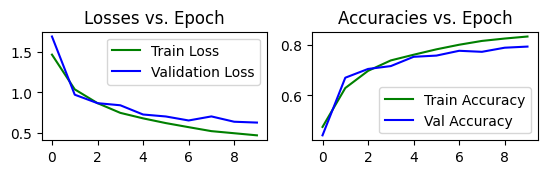

In [83]:
Vis_perf2(mod1,history)

#RGB images with model having single dense layer 


In [84]:
# Usimg model 2 with colored images
mod1=Model2()
mod1.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)
# To preprocess images data gen is used 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#  training the mod1
batch_size=128

history=mod1.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_valid, y_valid)
)






Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_37 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                     

<ipython-input-84-80b69c8387cb>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=mod1.fit_generator(


326/326 [==============================] - 28s 78ms/step - loss: 1.5335 - sparse_categorical_accuracy: 0.4882 - val_loss: 1.6601 - val_sparse_categorical_accuracy: 0.5066
Epoch 2/10
326/326 [==============================] - 25s 76ms/step - loss: 1.0178 - sparse_categorical_accuracy: 0.6411 - val_loss: 0.9256 - val_sparse_categorical_accuracy: 0.6897
Epoch 3/10
326/326 [==============================] - 25s 77ms/step - loss: 0.8541 - sparse_categorical_accuracy: 0.7019 - val_loss: 0.9152 - val_sparse_categorical_accuracy: 0.6897
Epoch 4/10
326/326 [==============================] - 25s 77ms/step - loss: 0.7763 - sparse_categorical_accuracy: 0.7306 - val_loss: 0.8218 - val_sparse_categorical_accuracy: 0.7286
Epoch 5/10
326/326 [==============================] - 25s 77ms/step - loss: 0.6855 - sparse_categorical_accuracy: 0.7624 - val_loss: 0.7888 - val_sparse_categorical_accuracy: 0.7423
Epoch 6/10
326/326 [==============================] - 25s 78ms/step - loss: 0.6457 - sparse_categoric

1/1 [==============================] - 0s 117ms/step


<Figure size 400x300 with 0 Axes>

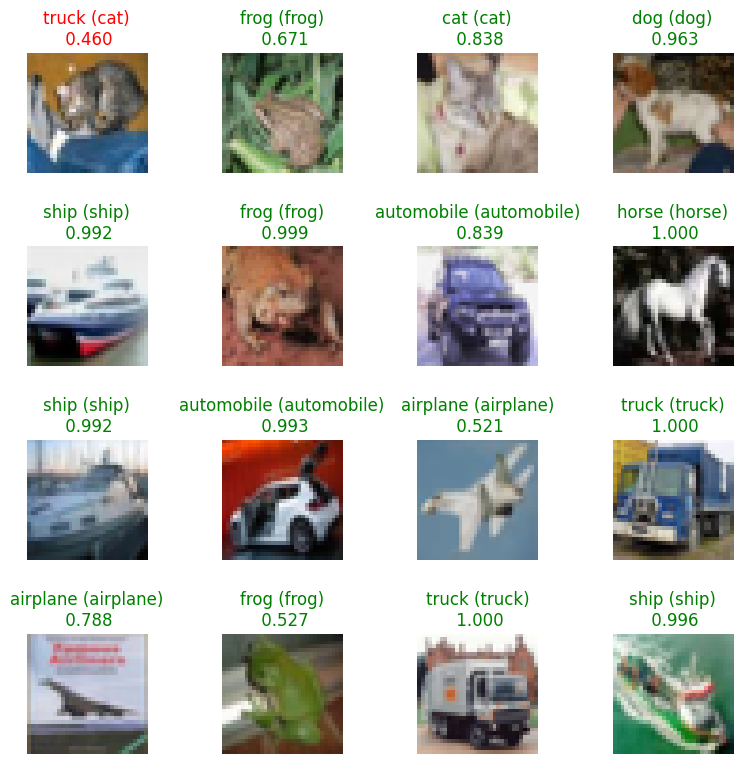

In [86]:
Vis_perf1(mod1)


['test_loss', 'test_accuracy']
['loss', 'sparse_categorical_accuracy']
[0.7063859105110168, 0.7763000130653381]



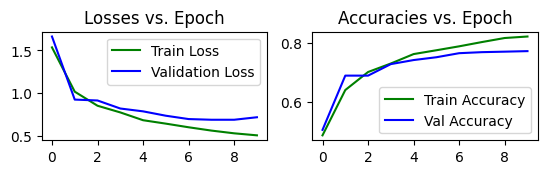

In [87]:
Vis_perf2(mod1,history)